In [1]:
import mplfinance as mpf
from ta import trend
from src.utils import get_candles_df
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression
import numpy as np
from matplotlib import pyplot as plt

Просто демонстрация загрузки данных

                             volume    open   close    high     low
time                                                               
2021-12-06 04:00:00+00:00  26635166  161.70  165.32  167.87  161.70
2021-12-07 04:00:00+00:00  25282674  166.30  171.18  173.60  165.18
2021-12-08 04:00:00+00:00  24227248  172.06  175.08  175.92  170.75
2021-12-09 04:00:00+00:00  21951736  175.15  174.56  176.72  173.58
2021-12-10 04:00:00+00:00  24803958  174.27  179.45  179.69  174.27
...                             ...     ...     ...     ...     ...
2022-12-02 04:00:00+00:00   4911995  147.21  148.00  148.57  145.02
2022-12-03 04:00:00+00:00       124  147.43  146.94  147.55  146.49
2022-12-04 04:00:00+00:00        22  147.31  146.37  147.33  146.37
2022-12-05 04:00:00+00:00  16275315  146.50  146.78  150.91  145.78
2022-12-06 04:00:00+00:00   4152978  146.44  144.58  149.00  143.56

[325 rows x 5 columns]


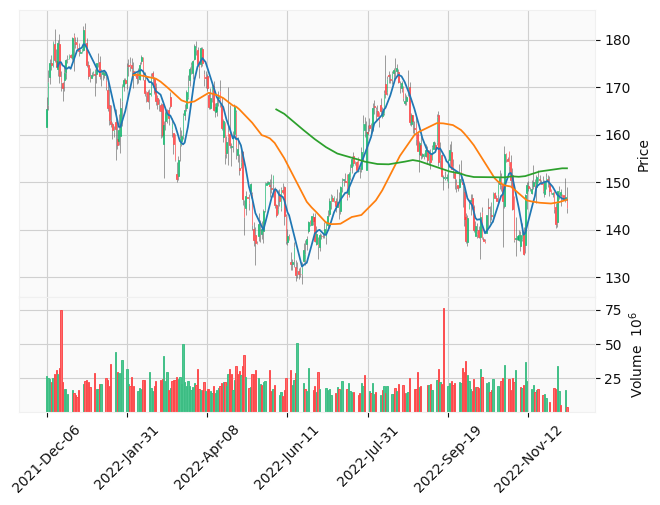

In [2]:
df = get_candles_df()
ma8 = mpf.make_addplot(trend.sma_indicator(df['close'], window=8))
ma55 = mpf.make_addplot(trend.sma_indicator(df['close'], window=55))
ma144 = mpf.make_addplot(trend.sma_indicator(df['close'], window=144))
print(df)
plots = [ma8, ma55, ma144]
mpf.plot(df[['volume', 'open', 'close', 'high', 'low']],
            type='candle', style='yahoo', addplot=plots, volume=True)
mpf.show()

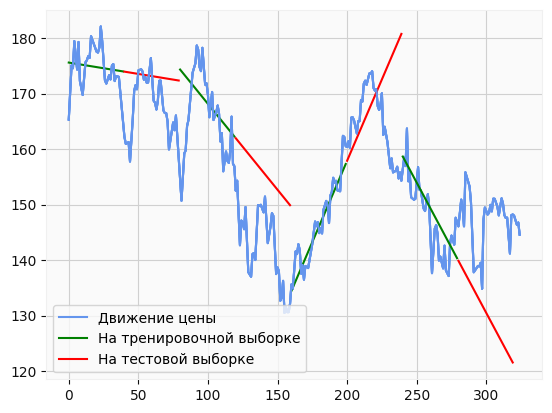

In [38]:
regressor = TheilSenRegressor()
x = range(df.shape[0])
y = df['close']
n_intervals = 4

step = len(x) // (n_intervals * 2)
for i in range(0, n_intervals * 2,2):
    x_train = np.array(x[step * i:step * (i + 1)]).reshape(-1,1)
    y_train = y[step * i:step * (i + 1)]
    x_test = np.array(x[step * (i + 1):step * (i+2)]).reshape(-1,1)
    regressor.fit(x_train,y_train)
    y_tr = regressor.predict(x_train)
    y_pred = regressor.predict(x_test)
    plt.plot(x,y, color = 'cornflowerblue')
    plt.plot(x_train,y_tr, color = 'green')
    plt.plot(x_test,y_pred, color = 'red')

plt.axis('tight')
plt.legend(loc='lower left', labels = ['Движение цены', 'На тренировочной выборке', 'На тестовой выборке'])
plt.show()